In [26]:
from sympy import *
import sympy
import numpy as np
import matplotlib.pyplot as plt
import time 
import shapely
from shapely.geometry import LineString, Point
from sympy import *
from sympy import diff as D


In [27]:

def power21(f):
    test=True
    while test:
        test=False
        for i in vars:
            f1= f.subs(i**2, i)
            if f1!=f:
                test==True
                f=f1

    return f 

In [28]:

def createvars(n):

    symbols_dict = dict(('x%d'%k, symbols('x%d'%k)) for k in range(n))
    return  symbols_dict

In [29]:
def createrandomp(n):
    

    p=[]
    for i in range(n):
        while True:
            a=np.random.random()
            b=np.random.random()

            if not((a,b) in p):
                p.append((a,b))
                break
    return p

def plot(p):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5


def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
            
def printpath(p,path):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)
def intersect (p , i , j, k, l):
    
    A = p[i]
    B = p[j]

    #line 2
    C = p[k]
    D = p[l]

    line1 = LineString([A, B])
    line2 = LineString([C, D])

    int_pt = line1.intersection(line2)

    if int_pt.is_empty: 
        #print('empty')
        return False
    if type(int_pt)==shapely.geometry.linestring.LineString: 
        #print('line',int_pt)
        return True
    elif type(int_pt)==shapely.geometry.point.Point:
        point_of_intersection = int_pt.x, int_pt.y
        
        #print('point')
  
        if point_of_intersection in (A,B,C,D): 
            
            if len((A,B,C,D))==len(set((A,B,C,D))): return True
            else: return False

        else: return True    

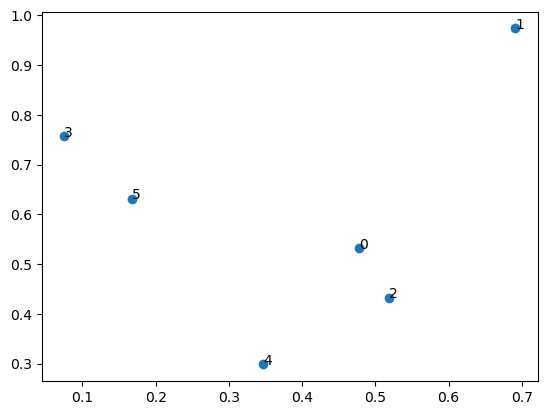

In [51]:
n=6
p=createrandomp(n)
plot(p)

In [52]:
couples=[(i,j) for i in range(n) for j in range(i+1,n)]
distances=[dist(p,i,j) for i in range(n) for j in range(i+1,n)]
N=len(couples)#n*(n-1)/2
symbols_dict=createvars(N)
locals().update(symbols_dict)
vars=list(symbols_dict.values())
err=0.001
xcouples=dict((vars[var],couples[var]) for var in range (len(vars)))

xcouples

{x0: (0, 1),
 x1: (0, 2),
 x2: (0, 3),
 x3: (0, 4),
 x4: (0, 5),
 x5: (1, 2),
 x6: (1, 3),
 x7: (1, 4),
 x8: (1, 5),
 x9: (2, 3),
 x10: (2, 4),
 x11: (2, 5),
 x12: (3, 4),
 x13: (3, 5),
 x14: (4, 5)}

In [53]:
symbols_dict

{'x0': x0,
 'x1': x1,
 'x2': x2,
 'x3': x3,
 'x4': x4,
 'x5': x5,
 'x6': x6,
 'x7': x7,
 'x8': x8,
 'x9': x9,
 'x10': x10,
 'x11': x11,
 'x12': x12,
 'x13': x13,
 'x14': x14}

In [54]:
def sumpointcond(couples,vars,k):
#cond of the k th point
    kcond=0
    for i in range (len(couples)):
        if k in couples[i]:
            kcond+=vars[i]
    return kcond

In [55]:
def fullsumpointcond(couples,vars):
    conds= []
    for i in range (n):
        conds.append(sumpointcond(couples,vars,i))
    return conds
        

In [56]:
vars [0]

x0

In [57]:
def fullpointmultcond(f):#f is the rresult of fullsumpointcond(couples,vars) and returns the xi*xj*xk cond
    l=[]
    for cond in f:
        listofvars=cond.args
        for i in range(len(listofvars)):
            for j in range(i+1,len(listofvars)):
                for k in range(j+1,len(listofvars)):
                    l.append(listofvars[i]*listofvars[j]*listofvars[k])
    return l

In [58]:
def intersectioncond():
    prohibited=[]
    for i in range (len(p)):
            for j in range (len(p)):
                if j!=i:
                    for k in range(len(p)):
                        for l in range(len(p)):
                            if k!=l:
                                #print(i,j,k,l)
                                if len(set((i,j,k,l)))>2:
                                    if intersect(p,i,j,k,l):
                                        #print('done')
                                        prohibited.append(vars[couples.index((min(i,j),max(i,j)))]*vars[couples.index((min(k,l),max(k,l)))])
                                        prohibited=list(set(prohibited))
    return prohibited


In [59]:
intersectioncond()

[x2*x8, x4*x7, x7*x9, x3*x9, x11*x3, x4*x9, x11*x7, x8*x9, x2*x7]

In [60]:
def fullcond():
    c=set(fullsumpointcond(couples,vars))
    c1=set(fullpointmultcond(c))
    #print(c1)
    c2=set(intersectioncond())
    c=c2.union(c1)
    #the boucles
    xes=list(xcouples.keys())
    for x1 in range( len(xes)):
        print(xes[x1])
        for x2 in range( x1+1,len(xes)):
            for x3 in range( x2+1,len(xes)):
                
                l=[]
                l.extend(xcouples[xes[x1]])
                l.extend(xcouples[xes[x2]])
                l.extend(xcouples[xes[x3]])
                #print(l)
                l=set(l)
                #print(len(l)==4)
                if len(l)<4:
                    c.add(xes[x1]*xes[x2]*xes[x3])

    return c

In [61]:
cond =fullcond()
cond

x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
x14


{x0*x1*x2,
 x0*x1*x3,
 x0*x1*x4,
 x0*x1*x5,
 x0*x2*x3,
 x0*x2*x4,
 x0*x2*x6,
 x0*x3*x4,
 x0*x3*x7,
 x0*x4*x8,
 x0*x5*x6,
 x0*x5*x7,
 x0*x5*x8,
 x0*x6*x7,
 x0*x6*x8,
 x0*x7*x8,
 x1*x10*x11,
 x1*x10*x3,
 x1*x10*x5,
 x1*x10*x9,
 x1*x11*x4,
 x1*x11*x5,
 x1*x11*x9,
 x1*x2*x3,
 x1*x2*x4,
 x1*x2*x9,
 x1*x3*x4,
 x1*x5*x9,
 x10*x11*x14,
 x10*x11*x5,
 x10*x11*x9,
 x10*x12*x14,
 x10*x12*x3,
 x10*x12*x7,
 x10*x12*x9,
 x10*x14*x3,
 x10*x14*x7,
 x10*x3*x7,
 x10*x5*x7,
 x10*x5*x9,
 x11*x13*x14,
 x11*x13*x4,
 x11*x13*x8,
 x11*x13*x9,
 x11*x14*x4,
 x11*x14*x8,
 x11*x3,
 x11*x4*x8,
 x11*x5*x8,
 x11*x5*x9,
 x11*x7,
 x12*x13*x14,
 x12*x13*x2,
 x12*x13*x6,
 x12*x13*x9,
 x12*x14*x3,
 x12*x14*x7,
 x12*x2*x3,
 x12*x2*x6,
 x12*x2*x9,
 x12*x3*x7,
 x12*x6*x7,
 x12*x6*x9,
 x13*x14*x4,
 x13*x14*x8,
 x13*x2*x4,
 x13*x2*x6,
 x13*x2*x9,
 x13*x4*x8,
 x13*x6*x8,
 x13*x6*x9,
 x14*x3*x4,
 x14*x3*x7,
 x14*x4*x8,
 x14*x7*x8,
 x2*x3*x4,
 x2*x6*x9,
 x2*x7,
 x2*x8,
 x3*x9,
 x4*x7,
 x4*x9,
 x5*x6*x7,
 x5*x6*x8,
 x5*x6*x9,
 x5*

In [74]:
J=0
valid=[]
d=list(xcouples.keys())
for x1 in range(len(xcouples.keys())) :
    print(x1)
    for x2 in range(x1+1,len(xcouples.keys())) :
        for x3 in range(x2+1,len(xcouples.keys())) :
            test=True
            for i in cond:
                if len(i.args)==2:
                    for v in vars:
                        if (d[x1]*d[x2]*d[x3])==i*v:
                            test=False
                            break
                else:
                    if (d[x1]*d[x2]*d[x3])==i:
                            test=False
                            break
            if test:
                valid.append(d[x1]*d[x2]*d[x3])
                J+=d[x1]*d[x2]*d[x3]*dist(p,*couples[x1])*dist(p,*couples[x2])*dist(p,*couples[x3])
            #print(d[x1]*d[x2]*d[x3],couples[x1],couples[x2],couples[x3], string)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


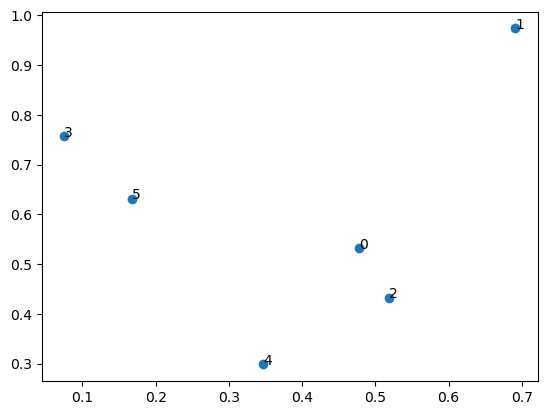

In [75]:
plot(p)

In [76]:
valid

[x0*x11*x2,
 x0*x14*x2,
 x0*x11*x5,
 x0*x14*x5,
 x0*x10*x13,
 x0*x11*x12,
 x0*x11*x14,
 x0*x12*x14,
 x1*x13*x3,
 x1*x4*x5,
 x1*x10*x4,
 x1*x12*x4,
 x1*x14*x4,
 x1*x13*x5,
 x1*x10*x8,
 x1*x10*x12,
 x1*x12*x13,
 x11*x2*x5,
 x14*x2*x5,
 x10*x13*x2,
 x11*x12*x2,
 x11*x14*x2,
 x12*x14*x2,
 x10*x3*x4,
 x13*x3*x4,
 x10*x13*x3,
 x10*x13*x4,
 x10*x14*x4,
 x11*x14*x5,
 x12*x14*x5,
 x10*x12*x13,
 x10*x13*x14,
 x11*x12*x14]

In [77]:
len(valid)

33

In [78]:
coeff=J.as_coefficients_dict()
coeff

defaultdict(int,
            {x12: 0.532391261422724,
             x9: 0.549565172107172,
             x8: 0.625315070952329,
             x4: 0.326430334623607,
             x6: 0.652787841229528,
             x7: 0.758094285119563,
             x11: 0.404163878920092,
             x10: 0.218402516954374,
             x13: 0.155200861368594,
             x14: 0.378310008055368,
             x3: 0.267737675127967,
             x5: 0.568062617531193,
             x1: 0.107318006083469,
             x2: 0.461424070417243,
             x0: 0.490729853525285})

In [79]:
def minw(coeff):# find the next w to add to path
    minimum=min(coeff.values())
    for i in coeff.keys():
        
        if coeff[i]==minimum:
            return i
def appliestocond(s):#s does not contain a prohibited w
    if type(s)==int: return True
    else:
        
        args=s.args
        for i in cond:
            test=True
            argi=i.args
            for j in argi:
                if not(j in args):
                    test=False
                    break
            if test:
                return False
        return True
                
                
    
    
    
    
    #test=True
    #for j in cond:
        #if s.subs(j,1)!=s:
            #print(j)
            #test=False
            #break
    
    #return test

            

    
def pathof(coeff):#the path resulting from the coeff
    coeff1=coeff.copy()
    #print(coeff1)
    s=1
    while coeff1:
        wmin= minw(coeff1)
        s1=s*wmin
        s1=power21(s1)
        #print(s1 , appliestocond(s1), not(cycle(s1)), testpath(s1))
        if appliestocond(s1) and ((not(cycle(s1))) or testpath(s1)) :
            s=s1
        del coeff1[wmin]
    return s
     
            
def testpath(s):#contains n x's
    #print(s.args,n)
    return len(s.args)==n

def fullpath(coeff):
    
    minimum=minw(coeff)
    s=pathof(coeff)
    #print(coeff)
    if testpath(s):
        return s
    else:
        
        del coeff[minimum]
        cond.add(minimum)
        #print(cond)
        return fullpath(coeff)
    
    

def cycle(s):
    l=[]
    for i in s.args:
        l.append(xcouples[i])
    #print(l)
    path=[]
    path.extend(l[0])
    del l[0]
    while(l):
        exists=False
        for i in l:
            

            if path[-1] == i[0]:
                exists=True
                
                path.append(i[1])
                del l[l.index(i)]
                #print(path)
                if path[-1] in path [:-2]: return True
                break

         
            elif path[-1] == i[1]:
                exists=True
                path.append(i[0])
                del l[l.index(i)]
                #print(path)
                if path[-1] in path [:-2]: return True
                break
        #print(path) 
        #print(exists)
        if exists==False:
            try : 
                path=[]
                path.extend(l[0])
                del l[0]
            except:
                pass
    return False
def ultimatefullpath():
    l=[]
    test=True
    coeff=J.as_coefficients_dict()
    
    while test:
        try:
            
            print(len(coeff))
            solution=fullpath(coeff)
            if type(solution)!= int :
                l.append(solution)
            del coeff[minw(coeff)]
        except:
            
            test=False
            print(test)
    return l




In [80]:
l=ultimatefullpath()
l

15
False


[]

In [81]:
def finalpath(l):
    distances=[]
    paths=[]
    for solution in l:
        if type (solution)==int:
            print('error')
        else:
            road=[]
            for x in solution.args:
                road.append(xcouples[x])
            path=[]
            #print(road)
            path.extend(road[0])
            del road[0]
            #print(road)
            while road:
                test=True
                for i in range (len(road)):
                    #print(i, road[i])
                    if path[-1] in road[i]:
                        test=False
                        if path[-1]==road[i][0]:
                            path.append(road[i][1])

                        else: path.append(road[i][0])
                        del road[i]
                        break
                if test:
                    print('error: point',path[-1],' not existing')
                    break
            #print(path)
            paths.append(path)
            distances.append(custompath(p,path))
    print(distances)

    print(paths)
    mindist= min(distances)
    solution=paths[distances.index(mindist)]
    return solution



In [82]:
path= finalpath(l)

[]
[]


ValueError: min() arg is an empty sequence

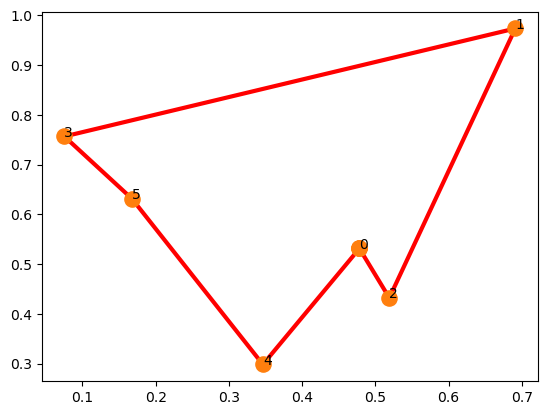

In [71]:
printpath(p,path)

In [72]:
custompath(p,[0,1,3,5,4,2,0])#mypath

2.0027490872166185

In [73]:
custompath(p,path)#pc's

2.129417009396119

In [ ]:
def getCity():
    cities = []
    f = open("wi29.tsp")
    for i in f.readlines():
        if not( "EOF" in i):
            
            node_city_val = i.split()
            cities.append((float(node_city_val[1]), float(node_city_val[2])))
    return cities

In [ ]:
p=getCity()
p

In [ ]:
plot(p)

In [ ]:
n=len(p)
couples=[(i,j) for i in range(n) for j in range(i+1,n)]
distances=[dist(p,i,j) for i in range(n) for j in range(i+1,n)]
N=len(couples)#n*(n-1)/2
symbols_dict=createvars(N)
locals().update(symbols_dict)
vars=list(symbols_dict.values())
err=0.001
xcouples=dict((vars[var],couples[var]) for var in range (len(vars)))



In [ ]:
cond =fullcond()
cond